<a href="https://colab.research.google.com/github/salsaady/SYSC4415/blob/main/Assignment1/SYSC4415_W25_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/jrgreen7/SYSC4906/blob/master/W2025/Assignments/A1/SYSC4415_W25_A1.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Setup for local Running if you are not using Google Colab

Install [Anaconda distribution] (https://docs.anaconda.com/anaconda/install/)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn/sklearn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.
* **waterqmark**: A Jupyter Notebook extension for printing timestamps, version numbers, and hardware information.

To make sure you have all of the packages you need, install them with `conda`:

```
conda create -n SYSC4415_tutorials python=3.11
conda activate SYSC4415_tutorials

conda install jupyter
conda install numpy pandas scikit-learn matplotlib seaborn graphviz statsmodels
conda install -c conda-forge watermark

```

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

## NOTE about Signature in Google Colab:

Use `!pip install watermark` in Google Colab if you have errors while signing your notebook. If you work locally and follow the instructions above in the correct order, it should be already installed.

## General Instructions:

Please print out values when asked using Python's print() function with f-strings where possible.

Submit your saved notebook with all the outputs to Brightspace, but make sure that it will produce correct outputs upon restarting and click "runtime" → "run all" with clean outputs. Ensure your notebook displays all answers when this is clicked.

## Your Submission MUST contain your signature at the bottom.


In [ ]:
# Name: Sarah Al-Saady
# Student Number: 101226759

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz

## Section 1: Gradients (4 marks)
Hint: use attached PDF if you get lost.

In [ ]:
"""
Q1a (1 mark)
- Manually derive and calculate the gradient of the function: f(x,y,z) = e^(x²) + y^y + e^(xy) + zcos(x) at point (0,1, 1)
- Show each component of the gradient.

Print your answer using print() function showing all three partial derivatives.
"""

print("Partial derivative w.r.t. x: f'(x) = 2xe^(x^2) + ye^(xy) - zsin(x)")
print("Partial derivative w.r.t. y: f'(y) = y^y(ln(y) + 1) + xe^(xy)")
print("Partial derivative w.r.t. z: f'(z) = cos(x)")
print("Plugging point (0, 1, 1) into f'(x) = 0 + 1 + 0")
print("Plugging point (0, 1, 1) into f'(y) = 1")
print("Plugging point (0, 1, 1) into f'(z) = 1")
print("Therefore, the gradient at point (0, 1, 1) is (1, 1, 1)")


Partial derivative w.r.t. x: f'(x) = 2xe^(x^2) + ye^(xy) - zsin(x)
Partial derivative w.r.t. y: f'(y) = y^y(ln(y) + 1) + xe^(xy)
Partial derivative w.r.t. z: f'(z) = cos(x)
Plugging point (0, 1, 1) into f'(x) = 0 + 1 + 0
Plugging point (0, 1, 1) into f'(y) = 1
Plugging point (0, 1, 1) into f'(z) = 1
Therefore, the gradient at point (0, 1, 1) is (1, 1, 1)


In [ ]:
"""
Q1b (1 mark)
For each component of the gradient calculated in Q1a:
- Explain what the value means geometrically
- Provide a conclusion about each term and gradient in general
"""

print("Each component of the gradient calculated in Q1a represent equations for the instantaneous rates of change for each direction of the gradient vector, meaning either parallel to axis x, y, or z.")
print("The partial derivative w.r.t x evaluates to 1 at x = 0, this means that for the function f(x,y,z) at point x = 0, the rate of change of the function in the x direction is 1.")
print("Likewise, for the function f(x,y,z) at point y = 1, the rate of change of the function in the y direction is 1, and for the function f(x,y,z) at point z = 1, the rate of change of the function in the z direction is 1.")
print("\nGeometrically, the gradient vector (1, 1, 1) represents the direction of the greatest increase of the function at point (0, 1, 1). This direction is diagonal, equally oriented along the x, y, and z axes. Moving in this direction from the given point will result in the steepest ascent of the function.")


Each component of the gradient calculated in Q1a represent equations for the instantaneous rates of change for each direction of the gradient vector, meaning either parallel to axis x, y, or z.
The partial derivative w.r.t x evaluates to 1 at x = 0, this means that for the function f(x,y,z) at point x = 0, the rate of change of the function in the x direction is 1.
Likewise, for the function f(x,y,z) at point y = 1, the rate of change of the function in the y direction is 1, and for the function f(x,y,z) at point z = 1, the rate of change of the function in the z direction is 1.

Geometrically, the gradient vector (1, 1, 1) represents the direction of the greatest increase of the function at point (0, 1, 1). This direction is diagonal, equally oriented along the x, y, and z axes. Moving in this direction from the given point will result in the steepest ascent of the function.


In [ ]:
"""
Q1c (2 marks)
Write a Python function to verify your gradient calculation numerically:
1. Implement the function f(x,y,z)
2. Calculate numerical approximations of partial derivatives using small perturbations
3. Compare your analytical results from Q1a with numerical approximations
4. Report the result of function evaluation at the point (0,1,1)
"""

def f(x, y, z):
    return np.exp(x**2) + y**y + np.exp(x*y) + z*np.cos(x)

h = 0.00010 #step value
x = 0
y = 1
z = 1
df_dx = (f(x + h, y, z) - f(x - h, y, z)) / (2 * h)
df_dy = (f(x, y + h, z) - f(x, y - h, z)) / (2 * h)
df_dz = (f(x, y, z + h) - f(x, y, z - h)) / (2 * h)

print(f"Numerical approximation of partial derivative df_dx: {df_dx}")
print(f"Numerical approximation of partial derivative df_dy: {df_dy}")
print(f"Numerical approximation of partial derivative df_dz: {df_dz}")

print("Comparing the numerical approximations with the analytical results from Q1a, since Q1a results were (1, 1, 1), the numerical results are approximately the same.")

print(f"The result of function evaluation at point (0, 1, 1) is: {f(0, 1, 1)}")


Numerical approximation of partial derivative df_dx: 1.0000000016674448
Numerical approximation of partial derivative df_dy: 1.000000004998114
Numerical approximation of partial derivative df_dz: 0.9999999999976694
Comparing the numerical approximations with the analytical results from Q1a, since Q1a results were (1, 1, 1), the numerical results are approximately the same.
The result of function evaluation at point (0, 1, 1) is: 4.0


## Section 2: Data Analysis (8 marks)

This section uses the Palmer Penguins dataset, which contains measurements from three penguin species.
The dataset includes physical measurements like bill length, bill depth, flipper length, and body mass. We are building a penguin classifier. First we need to assess out data.

In [ ]:
"""
Q2a (1 mark)
✅ Load the Palmer Penguins dataset using Seaborn's load_dataset (provided)
- Show that it contains valid data
- Create variables for numerical features and labels
- Perform basic statistical analysis by printing the general statistics table as in Tutorials.
- Find missing values and drop records with missing values for any feature
- Save entries with missing values for "sex" in a separate variable, we'll use it later.
"""

# Load data
penguins = sb.load_dataset("penguins")

# Show that it contains valid data
print("Confirming the dataset contains valid data: \n")
print(penguins.head())

# Creating variables
num_features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
labels = penguins['species']

# Print general statistics table
print("\nGeneral statistics table: \n")
print(penguins.describe())

# Drop records with missing values
penguins_noNA = penguins.dropna()
print("\nDropped missing values: \n")
print(penguins_noNA.head())

# Save missing "sex" in variable
missing_sex = penguins[penguins['sex'].isnull()]
print(f"\nEntries with missing values for 'sex': \n\n{missing_sex}\n")

Confirming the dataset contains valid data: 

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  

General statistics table: 

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.00000

Scatterplot matrix: 



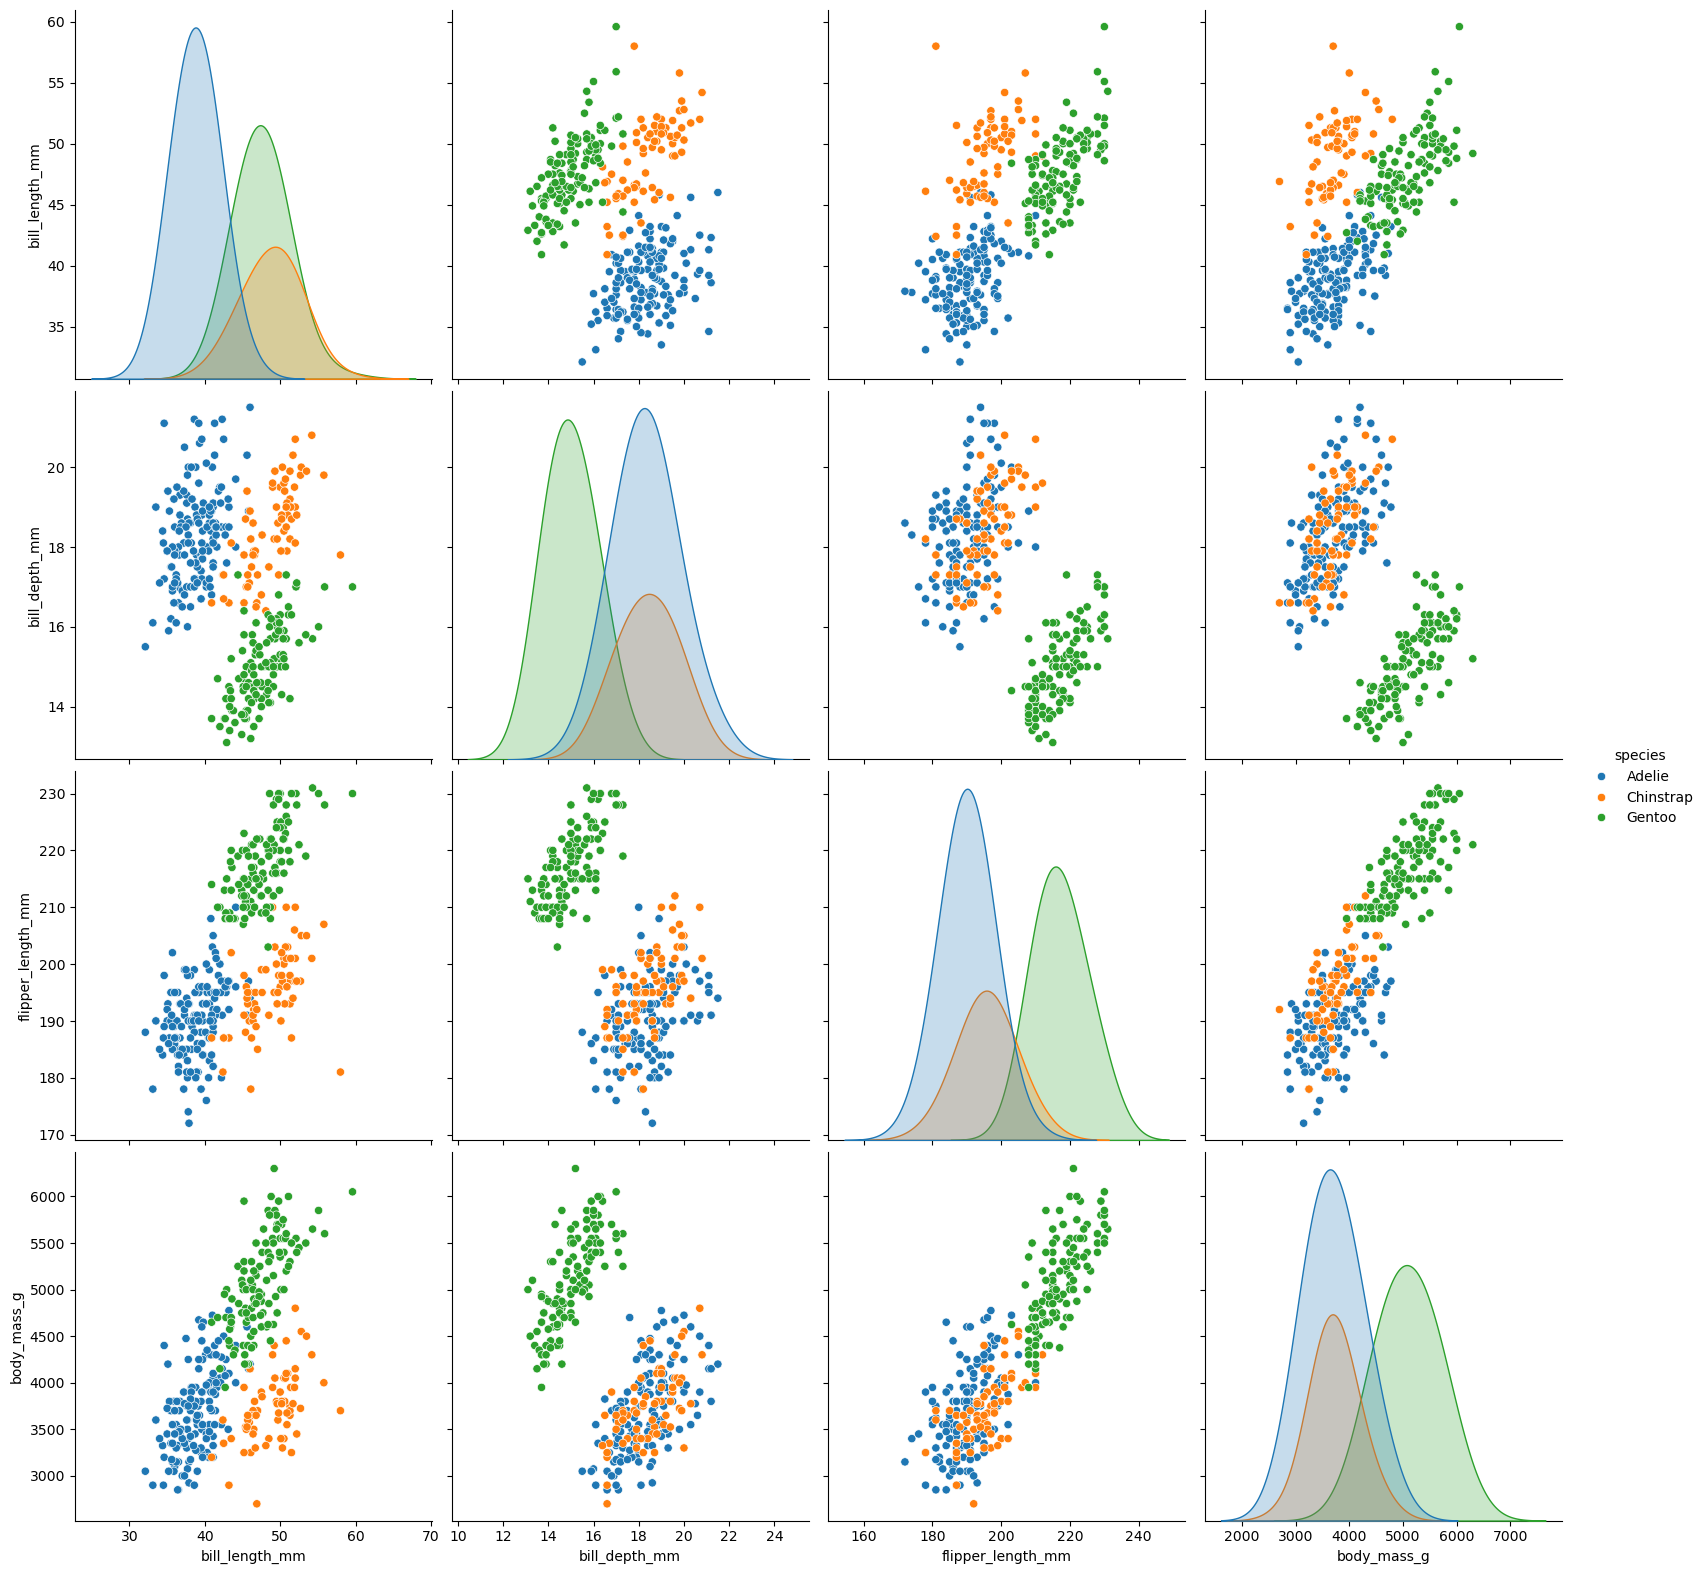

One feature with outliers is bill length. From the scatterplot matrix, There are many points that are exceptionallyhigher or lower than the typical measurements. For example, in the flipper_length_mm vs bill_length_mm graph, there are two noticeable Gentoo and Chinstrap penguin outliers, landing higher than the rest of the data points. In this example, most of the Chinstrap penguins land between bill_length 45 and 55, but there is an outlier close to 60, similarly for the Gentoo penguins. There are several outliers in the other bill_length_mm graphs as well. 

Histograms for Gentoo and Chinstrap penguins bill length distribution: 



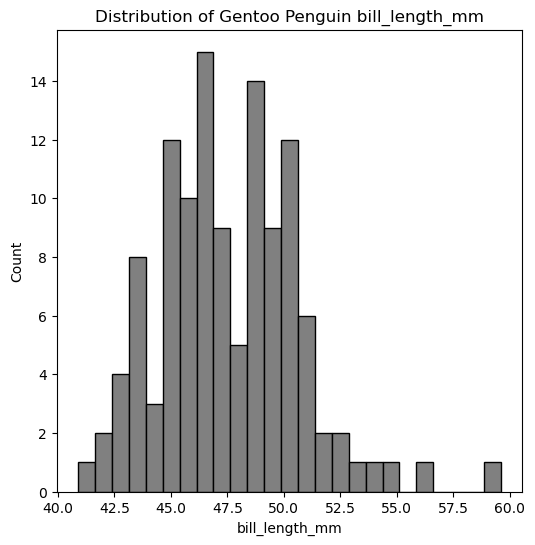

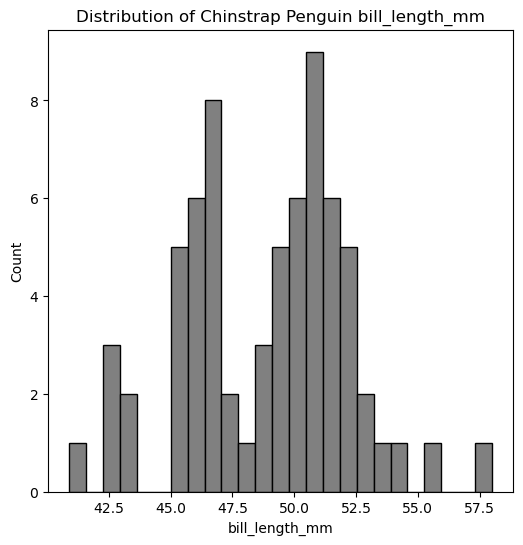

In [ ]:
"""
Q2b (2 marks)
Create visualizations showing:
- Create scatterplot matrix for visual assessment of data
- Identify one feature with outliers and show distribution values for two classes (2 histograms).
"""

# Scatterplot matrix
print("Scatterplot matrix: \n")
sb.pairplot(penguins_noNA, hue='species', diag_kws={'bw_method': 0.9}, height=4)
plt.show()

# Identify a feature with outliers
print("One feature with outliers is bill length. From the scatterplot matrix, There are many points that are exceptionallyhigher or lower than the typical measurements. For example, in the flipper_length_mm vs bill_length_mm graph, there are two noticeable Gentoo and Chinstrap penguin outliers, landing higher than the rest of the data points. In this example, most of the Chinstrap penguins land between bill_length 45 and 55, but there is an outlier close to 60, similarly for the Gentoo penguins. There are several outliers in the other bill_length_mm graphs as well. ")

gentoo_penguins = penguins_noNA[penguins_noNA['species'] == 'Gentoo']
chinstrap_penguins = penguins_noNA[penguins_noNA['species'] == 'Chinstrap']

print("\nHistograms for Gentoo and Chinstrap penguins bill length distribution: \n")
var2plot = 'bill_length_mm'
plt.figure(figsize= (6,6))
plt.hist(gentoo_penguins[var2plot], bins=25, color= 'grey', edgecolor= 'black')
plt.xlabel(var2plot)
plt.ylabel("Count")
plt.title(f"Distribution of Gentoo Penguin {var2plot}")
plt.show()

plt.figure(figsize= (6,6))
plt.hist(chinstrap_penguins[var2plot], bins=25, color= 'grey', edgecolor= 'black')
plt.xlabel(var2plot)
plt.ylabel("Count")
plt.title(f"Distribution of Chinstrap Penguin {var2plot}")
plt.show()


Analyzing the class distribution, there is a lot of overlap between the Adelie and Chinstap penguin measurements, which will make it more difficult to distinguish between the two species. The Gentoo penguin measurements do not overlap as much with the other species, meaning it will make it easy to distinguish between the gentoo penguins and the other penguin types.

Class count: 
species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

Class proportions: 
species
Adelie       0.438438
Gentoo       0.357357
Chinstrap    0.204204
Name: count, dtype: float64

Visualization of class proportions: 



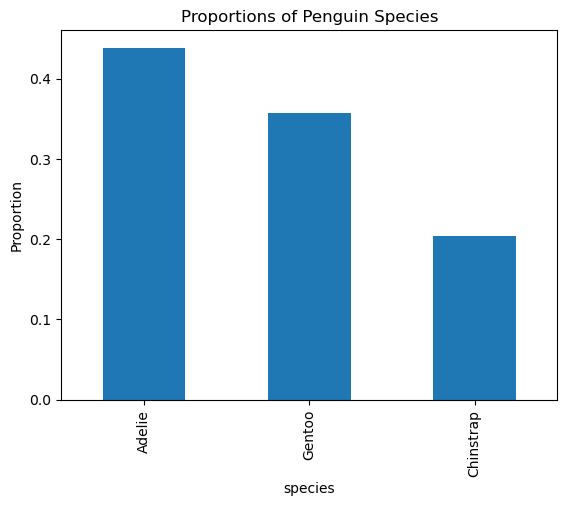


Overall, the Chinstrap penguin is noticeable proportionally less than the Adelie and Gentoo penguins based on the bar graph. This suggests a potential class imbalance and that there are fewer data samples from the Chinstrap species, compared to Adelie and Gentoo. This means the machine learning model trained on this data can develop a bias towards predicting the more common classes (Adelie and Gentoo), since they have more examples from which to learn.


In [ ]:
"""
Q2c (1 mark)
Analyze class distribution and discuss implications for model training:
- Calculate and visualize class proportions
- Identify any class imbalance
"""
print("\nAnalyzing the class distribution, there is a lot of overlap between the Adelie and Chinstap penguin measurements, which will make it more difficult to distinguish between the two species. The Gentoo penguin measurements do not overlap as much with the other species, meaning it will make it easy to distinguish between the gentoo penguins and the other penguin types.")

class_count = penguins_noNA['species'].value_counts()
class_proportions = class_count/len(penguins_noNA)
print(f"\nClass count: \n{class_count}")
print(f"\nClass proportions: \n{class_proportions}")

print("\nVisualization of class proportions: \n")
bar_graph = class_proportions.plot(kind='bar')
plt.title('Proportions of Penguin Species')
plt.ylabel('Proportion')
plt.show()

print("\nOverall, the Chinstrap penguin is noticeable proportionally less than the Adelie and Gentoo penguins based on the bar graph. This suggests a potential class imbalance and that there are fewer data samples from the Chinstrap species, compared to Adelie and Gentoo. This means the machine learning model trained on this data can develop a bias towards predicting the more common classes (Adelie and Gentoo), since they have more examples from which to learn.")

## Section 3: Model Development (8 marks)
After polishing thedata, let's make our classification model.

In [ ]:
"""
Q3a (2 marks)
Preprocess the data:
- Use the clean dataset from Q2a (with missing values removed)
- Split into training (80%) and test (20%) sets using random_state=42
- Print first 5 rows of training data with their species labels
- Print shapes of both datasets
- Show number of samples per species in each split
"""

# Split data

all_inputs = penguins_noNA[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
all_labels = penguins_noNA['species'].values

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.20, random_state=42)

# Print first 5 rows data
print("First 5 rows of training data and their labels:")
for i in range(5):
    print(training_classes[i], training_inputs[i])

# Shapes of both datasets
print(f"\nShape of training inputs dataset: {training_inputs.shape}")
print(f"Shape of testing inputs dataset: {testing_inputs.shape}")

# Number of samples per species in each split

training_count = pd.Series(training_classes).value_counts()
testing_count = pd.Series(testing_classes).value_counts()
print(f"Number of samples per species in training set:")
print(training_count)
print(f"\nNumber of samples per species in training set:")
print(testing_count)


First 5 rows of training data and their labels:
Gentoo [  40.9   13.7  214.  4650. ]
Adelie [  37.3   17.8  191.  3350. ]
Gentoo [  50.    15.9  224.  5350. ]
Adelie [  35.9   19.2  189.  3800. ]
Adelie [  40.5   18.9  180.  3950. ]

Shape of training inputs dataset: (266, 4)
Shape of testing inputs dataset: (67, 4)
Number of samples per species in training set:
Adelie       115
Gentoo        96
Chinstrap     55
Name: count, dtype: int64

Number of samples per species in training set:
Adelie       31
Gentoo       23
Chinstrap    13
Name: count, dtype: int64


Test accuracy score:
Testing accuracy score: 1.0
Training accuracy score: 1.0
Mean cross-validation score: 0.9669340463458111
Std cross-validation score: 0.024995034792155084

cv_scores histogram:



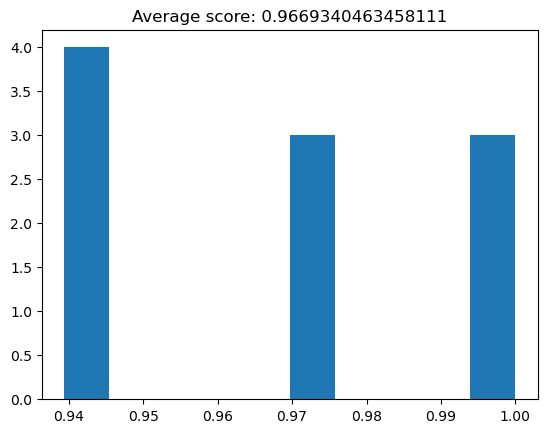


Since the testing and training accuracy scores were 1.0, this proposes a problem of overfitting. The 10-fold cross-validation splits the data into 10 subsets, uses one subset as testing and the rest as training, and keeps the class proportions the same across all of the folds. The mean score is the average score obtained from all the 10 folds. In the histogram above, the x axis represents the ranges of accuracy scores obtained from the 10-fold CV. Each value is close to 1.0, indicating high accuracy across different folds. The y axis indicates how many times scores within those specific ranges occured during the CV process. For the range of ~0.94 accuracy, there were 4 folds that achieved that accuracy. For ~0.97 accuracy, there were 3 folds, and for ~1.0 accuracy, there were also 3 folds. The overall average score is 0.9669340463458111, which means there is high accuracy with the model's performance. 


In [ ]:
"""
Q3b (3 marks)
Train and evaluate a Decision Tree:
1. Create a Decision Tree with default parameters (random_state=42)
2. Evaluate the model:
   - Fit on training data (numerical features only)
   - Print training and test accuracy score for this tree
   - Perform 10-fold cross-validation
   - Print mean and std of cross-validation scores and build cv_scores histogram.
   - What does the histogram show?
"""

from sklearn.model_selection import cross_val_score

# Create decision tree
decision_tree_classifier = DecisionTreeClassifier(random_state = 42)
# Train the classifier on the training set
decision_tree_classifier.fit(training_inputs, training_classes)

print("Test accuracy score:")
testing_accuracy = decision_tree_classifier.score(testing_inputs, testing_classes)
print(f"Testing accuracy score: {testing_accuracy}")
training_accuracy = decision_tree_classifier.score(training_inputs, training_classes)
print(f"Training accuracy score: {training_accuracy}")

# 10-fold cross-validation
cv_scores = cross_val_score(decision_tree_classifier, all_inputs, all_labels, cv=10)\


mean = np.mean(cv_scores)
std = np.std(cv_scores)
print(f"Mean cross-validation score: {mean}")
print(f"Std cross-validation score: {std}")

# Build histogram
print("\ncv_scores histogram:\n")
plt.hist(cv_scores)
plt.title('Average score: {}'.format(mean))
# sb.pairplot(iris_data.dropna(), hue='class', height=3)
plt.show()
print("\nSince the testing and training accuracy scores were 1.0, this proposes a problem of overfitting. The 10-fold cross-validation splits the data into 10 subsets, uses one subset as testing and the rest as training, and keeps the class proportions the same across all of the folds. The mean score is the average score obtained from all the 10 folds. In the histogram above, the x axis represents the ranges of accuracy scores obtained from the 10-fold CV. Each value is close to 1.0, indicating high accuracy across different folds. The y axis indicates how many times scores within those specific ranges occured during the CV process. For the range of ~0.94 accuracy, there were 4 folds that achieved that accuracy. For ~0.97 accuracy, there were 3 folds, and for ~1.0 accuracy, there were also 3 folds. The overall average score is 0.9669340463458111, which means there is high accuracy with the model's performance. ")


Best score: 0.9639928698752229
Best parameters: {'max_depth': 5, 'max_features': 3}


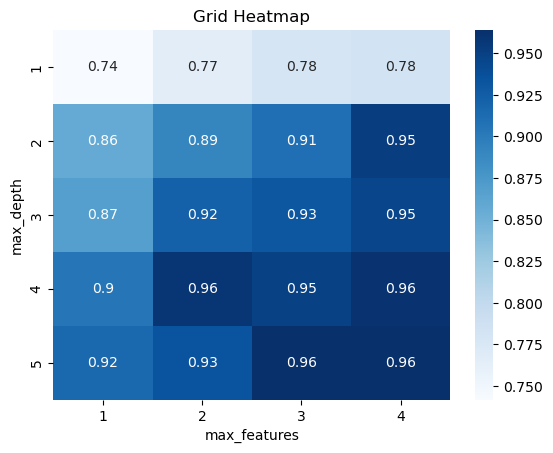


Best tree structure: 



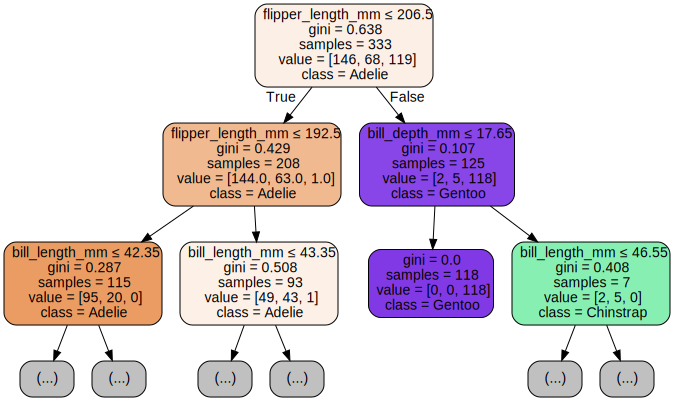

In [ ]:
"""
Q3c (3 marks)
Analyze the best model from grid search:
- Initialize parameter_grid, cross_validation using StratifiedKFold
- Identify the best parameters for the tree and show the grid heatmap (don't forget labels)
- Plot the best tree structure using graphviz, use max_depth=2 (for better display)

Note: when using export_graphviz set out_file=None and use display(graph) function call, where
graph is your variable instantiated with Source(dot_data)
Export_graphviz Documentation: https://scikit-learn.org/1.5/modules/generated/sklearn.tree.export_graphviz.html
"""
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

import graphviz
import sklearn.tree as tree
from sklearn.tree import export_graphviz
from graphviz import Source


decision_tree_classifier = DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)
grid_search = GridSearchCV(decision_tree_classifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(all_inputs, all_labels)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

# Grid heatmap
grid_visualization = grid_search.cv_results_['mean_test_score']
grid_visualization.shape = (5, 4)
sb.heatmap(grid_visualization, cmap='Blues', annot=True)
plt.xticks(np.arange(4) + 0.5, grid_search.param_grid['max_features'])
plt.yticks(np.arange(5) + 0.5, grid_search.param_grid['max_depth'])
plt.xlabel('max_features')
plt.ylabel('max_depth')
plt.title('Grid Heatmap')
plt.show()

# Get the best decision tree model from grid search

best_tree = grid_search.best_estimator_
dot_data = export_graphviz(
    best_tree,
    out_file=None,
    max_depth=2,
    feature_names=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g'],
    class_names=['Adelie', 'Chinstrap', 'Gentoo'],
    label='all',
    filled=True,
    proportion=False,
    rotate=False,
    rounded=True,
    special_characters=True,
    precision=3,
    fontname='helvetica',
)
print("\nBest tree structure: \n")
graph = Source(dot_data)
display(graph)

## Section 4: Missing_Sex Prediction (4 marks)
In this part of the assignment, we are building a model to infer the missing values from the original dataset to fix the broken records.


In [ ]:
"""
Q4a (2 marks)
Prepare data for sex prediction:
- Use the clean dataset (no missing values) from Section 2
- Convert species to numeric values.

Note: Unlike the example in the tutorial, we will use a more straightforward method, LabelEncoder().

For this task, you just need to instantiate it, use the fit_transform method on the "species" column,
and reassign or add the column.
See documentation for details:
https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.LabelEncoder.html

- Create new feature/label split using "sex" as target
- Scale features using StandardScaler().fit_transform(features) as in Tutorial
See documentation: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- Split data into training (80%) and test (20%) sets
- Train these classifiers:
  * Logistic Regression (solver='lbfgs')
  * Decision Tree (max_depth=3)
  * KNN (n_neighbors=5)
  * SVM (kernel="linear", C=0.025)
- Compare models using (Providing values for each would be enough):
  * Training and test accuracy
  * 10-fold cross-validation scores

"""

# Prepare features including species as numeric
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Convert species to numeric values
le = LabelEncoder()
penguins_noNA['species_encoded'] = le.fit_transform(penguins_noNA['species'])

# Create new features/label split using "sex" as target
features_new = penguins_noNA[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species_encoded']]
label_new = penguins_noNA['sex']

# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_new)

# Split data into training (80%) and test (20%) sets
all_inputs = scaled_features
all_labels = label_new.values

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.20, random_state=42)

# Train these classifiers:
classifier_names = ["Logistic Regression", "Decision Tree","KNN", "Linear SVM"]

classifiers = [
    LogisticRegression(solver='lbfgs'),   # Logistic Regression
    DecisionTreeClassifier(max_depth=3),  # Decision Tree Classifier (max tree depth of 5)
    KNeighborsClassifier(n_neighbors=5),   # K-Nearest-Neighbours Classifier, looking at three closest points
    SVC(kernel="linear", C=0.025)        # Linear SVM Classifier with C as penalty parameter for misclassified points
    ]

for name, clf in zip(classifier_names, classifiers):
    # Train the classifier
    clf.fit(training_inputs, training_classes)

    # Predict on the training and test set
    train_preds = clf.predict(training_inputs)
    test_preds = clf.predict(testing_inputs)

    # Calculate training and testing accuracy
    train_accuracy = accuracy_score(training_classes, train_preds)
    test_accuracy = accuracy_score(testing_classes, test_preds)

    # Calculate 10-fold cross validation
    cv_scores = cross_val_score(clf, all_inputs, all_labels, cv=10)


    print(f"{name} training accuracy: {train_accuracy:.2f}")
    print(f"{name} testing accuracy: {test_accuracy:.2f}")
    print(f"{name} 10-fold cross-validation mean accuracy: {cv_scores.mean():.2f} +/- {cv_scores.std():.2f}")


Logistic Regression training accuracy: 0.91
Logistic Regression testing accuracy: 0.90
Logistic Regression 10-fold cross-validation mean accuracy: 0.90 +/- 0.06
Decision Tree training accuracy: 0.93
Decision Tree testing accuracy: 0.84
Decision Tree 10-fold cross-validation mean accuracy: 0.87 +/- 0.07
KNN training accuracy: 0.95
KNN testing accuracy: 0.88
KNN 10-fold cross-validation mean accuracy: 0.90 +/- 0.05
Linear SVM training accuracy: 0.90
Linear SVM testing accuracy: 0.90
Linear SVM 10-fold cross-validation mean accuracy: 0.89 +/- 0.06


/var/folders/q4/n8bvb78n7jl9nklrjj49tkc80000gn/T/ipykernel_13428/239971820.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_noNA['species_encoded'] = le.fit_transform(penguins_noNA['species'])


In [ ]:
"""
Q4b (2 marks)
Use best model to predict missing sex:
- Make sure to create new variable for subset to work with and copy your variable with missing records into it,
using new_var = your_variable.copy().
- Print records with missing sex values from section 2.
- Remove records that have missing values other than sex using dropna: df.dropna(subset=['column_name'],inplace=True).
- Scale features using StandardScaler().fit_transform(features) as in Q3
- Create new features/labels variables for the new dataset.

- Select best classifier based on test performance from Q4a

- For each record in missing_sex dataset, using best_model.predict(features) and best_model.predict_proba(features)
- Add missing values to the clean dataset and make sure there are no missing values.
"""

# Create new variable for subset
new_missing_sex = missing_sex.copy()

print(f"Records with missing sex values: \n{new_missing_sex}")

# Remove records that have missing values other than sex
new_missing_sex.dropna(subset=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species'], inplace=True)

# Scale features and create variable
new_missing_sex['species'] = LabelEncoder().fit_transform(new_missing_sex['species'])
features = new_missing_sex[['species','bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].values
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Best classifier selected: logistic regression
logistic_model = LogisticRegression(solver='lbfgs', max_iter=500)   # Logistic Regression
logistic_model.fit(training_inputs, training_classes)
predicted_sex = logistic_model.predict(scaled_features)
predicted_sex_proba = logistic_model.predict(scaled_features)

# Add missing values to the clean dataset
new_missing_sex['sex'] = predicted_sex

# Remove rows from the original dataset where 'sex' was missing
penguins_noNA = penguins_noNA.dropna(subset=['sex'])

# Add the rows with newly predicted 'sex' values
penguins_noNA = pd.concat([penguins_noNA, new_missing_sex], ignore_index=True)

# Make sure there are no missing values
print(f"\nNumber of missing values: \n{penguins_noNA.isna().sum()}")


Records with missing sex values: 
    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8    

#### Congratulations! What you just did is called **model-based multiple imputation**. It is one of the methods used to treat missing data.

## Signature:
Don't forget to insert your name and student number and execute.

In [ ]:
# Provide your Signarure:
%load_ext watermark
%watermark -a 'Sarah Al-Saady, #101226759' -nmv --packages numpy,pandas,sklearn,matplotlib,seaborn,graphviz

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Author: Sarah Al-Saady, #101226759

Python implementation: CPython
Python version       : 3.12.7
IPython version      : 8.27.0

numpy     : 1.26.4
pandas    : 2.2.2
sklearn   : 1.5.1
matplotlib: 3.9.2
seaborn   : 0.13.2
graphviz  : 0.20.3

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 23.0.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

